In [3]:
import pandas as pd
import numpy as np
import itertools

import sys, os
sys.path.append(os.path.join(os.path.abspath('')))
from scripts.utils import get_sabdab_details

In [95]:
df_sabdab_all = pd.read_csv('structures/sabdab_summary_all.tsv', sep="\t")
df_sabdab_90 = pd.read_csv('structures/sabdab_summary_90.tsv', sep="\t")

df_buried = pd.read_pickle('data/epitope_buried.pickle')

df_interactions = pd.read_pickle('data/interactions.pickle')

#new
f_epitopes = "data/cdr_epitope.pickle"
availableStruct_df = pd.read_pickle(f_epitopes)
pdbs =set(availableStruct_df.idcode.values)

print(availableStruct_df.head())

  idcode chainID chain_type cdr     cdr_seq cdr_begin cdr_end  \
0   7mhy       M          H   1     GYTFTNY        45      51   
1   7mhy       M          H   2      SPNTGS        71      76   
2   7mhy       M          H   3  SRITGTWFAY       118     127   
3   7mhy       O          H   1     GYTFTNY        45      51   
4   7mhy       O          H   2      NTYTGE        71      76   

                                           cdr_atoms  \
0  [4168, 4169, 4170, 4171, 4172, 4173, 4174, 417...   
1  [4399, 4400, 4401, 4402, 4403, 4404, 4405, 440...   
2  [4734, 4735, 4736, 4737, 4738, 4739, 4740, 474...   
3  [5833, 5834, 5835, 5836, 5837, 5838, 5839, 584...   
4  [6049, 6050, 6051, 6052, 6053, 6054, 6055, 605...   

                                       epitope_atoms  \
0  [272, 274, 297, 298, 299, 300, 301, 2285, 2286...   
1                                             [2322]   
2  [269, 270, 272, 294, 295, 296, 297, 298, 302, ...   
3               [1594, 1604, 1605, 1606, 1607, 1

In [5]:
protein_antigens = df_sabdab_all.query("antigen_type == antigen_type and antigen_type.str.contains('protein')").drop_duplicates()
ab_protein_antigens = set(protein_antigens.pdb.values)
all_saddab_proteins = set(df_sabdab_all.pdb.values)
print(
    f"SabDab protein antigen:\n"
    f"{len(ab_protein_antigens)} proteins out of {len(all_saddab_proteins)}, "
    f"{round(len(ab_protein_antigens) / len(all_saddab_proteins) * 100, 1)}%"
)

SabDab protein antigen:
2715 proteins out of 4979, 54.5%


In [6]:
ab_both_chains = set(protein_antigens.query("Hchain == Hchain and Lchain == Lchain").pdb.values)
ab_single_H_chain = set(protein_antigens.query("Hchain == Hchain").pdb.values)
ab_single_L_chain = set(protein_antigens.query("Lchain == Lchain").pdb.values)

n_ab_no_Hchain = len(ab_protein_antigens) - len(ab_single_H_chain)
n_ab_no_Lchain = len(ab_protein_antigens) - len(ab_single_L_chain)

print(f"All: {len(ab_protein_antigens)}\nNo Hchain: {n_ab_no_Hchain}\nNo Lchain: {n_ab_no_Lchain}\nBoth chains: {len(ab_both_chains)}")

All: 2715
No Hchain: 10
No Lchain: 528
Both chains: 2177


In [7]:
buried_fullab = df_buried[df_buried.idcode.isin(ab_both_chains)]
print(
    f"Buried surfaces of {len(set(df_buried.idcode.values))} proteins\n"
    f"with both chains: {len(set(buried_fullab.idcode.values))}"
)

Buried surfaces of 2492 proteins
with both chains: 1974


In [8]:
buried_ab_ag_interface_res = buried_fullab[~buried_fullab[['idcode', 'ab_ag_interface']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'ab_ag_interface_res', 'ag_ab_interface_res', 'cdr_seq']]
buried_ab_ag_interface_res = buried_ab_ag_interface_res[~buried_ab_ag_interface_res[['idcode', 'cdr_seq']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'ab_ag_interface_res', 'ag_ab_interface_res']]
len(buried_ab_ag_interface_res)

2148

In [9]:
protein_antigens = df_sabdab_90.query("antigen_type == antigen_type and antigen_type.str.contains('protein')").drop_duplicates()
ab_protein_antigens = set(protein_antigens.pdb.values)
all_saddab_proteins = set(df_sabdab_90.pdb.values)
print(
    f"SabDab protein antigen:\n"
    f"{len(ab_protein_antigens)} proteins out of {len(all_saddab_proteins)}, "
    f"{round(len(ab_protein_antigens) / len(all_saddab_proteins) * 100, 1)}%"
)

SabDab protein antigen:
1154 proteins out of 2017, 57.2%


In [10]:
ab_both_chains = set(protein_antigens.query("Hchain == Hchain and Lchain == Lchain").pdb.values)
ab_single_H_chain = set(protein_antigens.query("Hchain == Hchain").pdb.values)
ab_single_L_chain = set(protein_antigens.query("Lchain == Lchain").pdb.values)

n_ab_no_Hchain = len(ab_protein_antigens) - len(ab_single_H_chain)
n_ab_no_Lchain = len(ab_protein_antigens) - len(ab_single_L_chain)

print(f"All: {len(ab_protein_antigens)}\nNo Hchain: {n_ab_no_Hchain}\nNo Lchain: {n_ab_no_Lchain}\nBoth chains: {len(ab_both_chains)}")

All: 1154
No Hchain: 0
No Lchain: 0
Both chains: 1154


In [11]:
buried_fullab = df_buried.query(f"idcode.isin({list(ab_both_chains)})")
notFound = ab_both_chains-set(buried_fullab.idcode.values)
print(len(buried_fullab.idcode.values))
print(buried_fullab.idcode.values[0],buried_fullab.idcode.values[1])
print(len(set(buried_fullab.idcode.values)))
print(
    f"Buried surfaces of {len(set(df_buried.idcode.values))} proteins\n"
    f"with both chains: {len(set(buried_fullab.idcode.values))}"
)
print(len(notFound))
print('Available for processing:',len(ab_both_chains.intersection(pdbs)))
notProcessed =notFound.intersection(pdbs)
print('Not processed:',notProcessed,len(notProcessed))
print('Not available:',len(notFound-pdbs))
notAvailable = notFound-pdbs
print(list(notAvailable)[0],list(notAvailable)[1])

10635
7mhy 7mhy
867
Buried surfaces of 2492 proteins
with both chains: 867
287
Available for processing: 904
Not processed: {'7cvy', '6ohg', '4r0l', '3j3o', '3j6u', '1ob1', '2j6e', '7jvc', '7ldd', '4o02', '6ii4', '7m6f', '2vwe', '6jfh', '7dzx', '7cvz', '5y0a', '6avq', '3ixx', '3j42', '4ag4', '6p3s', '5dwu', '6xob', '7buf', '7l58', '4v1d', '7dwu', '3zkm', '4c2i', '7dzy', '4uif', '6djp', '7jv4', '6lnt', '1qfu', '3jba'} 37
Not available: 250
7q9m 6xsw


In [49]:
buried_ab_ag_interface_res = buried_fullab[~buried_fullab[['idcode', 'ab_ag_interface']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'ab_ag_interface_res', 'ag_ab_interface_res', 'cdr_seq']]
buried_ab_ag_interface_res = buried_ab_ag_interface_res[~buried_ab_ag_interface_res[['idcode', 'cdr_seq']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'ab_ag_interface_res', 'ag_ab_interface_res']]
len(buried_ab_ag_interface_res)
# print(buried_ab_ag_interface_res.ab_ag_interface_res.values[0])
# print(buried_fullab.query("idcode=='7mhy'").ab_ag_interface_res)

0     [(M, 49, THR, CB, 1), (N, 91, SER, CB, 1), (N,...
1     [(M, 49, THR, CB, 2), (N, 91, SER, CB, 2), (N,...
2     [(M, 49, THR, CB, 3), (N, 91, SER, CB, 3), (N,...
3     [(O, 120, ASN, C, 1), (O, 120, ASN, O, 1), (P,...
4     [(O, 120, ASN, C, 2), (O, 120, ASN, O, 2), (P,...
5     [(O, 120, ASN, C, 3), (O, 120, ASN, O, 3), (P,...
6     [(M, 49, THR, CB, 1), (N, 91, SER, CB, 1), (N,...
7     [(M, 49, THR, CB, 2), (N, 91, SER, CB, 2), (N,...
8     [(M, 49, THR, CB, 3), (N, 91, SER, CB, 3), (N,...
9     [(O, 120, ASN, C, 1), (O, 120, ASN, O, 1), (P,...
10    [(O, 120, ASN, C, 2), (O, 120, ASN, O, 2), (P,...
11    [(O, 120, ASN, C, 3), (O, 120, ASN, O, 3), (P,...
Name: ab_ag_interface_res, dtype: object


In [11]:
def count_chains(x):
    ab_chains = protein_antigens.query(f"pdb == '{x['idcode']}' and {'L' if x['chain_type'] in 'LK' else 'H'}chain == '{x['chainID']}'")[['Hchain', 'Lchain']].values
    if len(ab_chains) != 1:
        return (None, None, None, None, None, None, None, None, None, None, None)
    assert len(ab_chains) == 1, print(x['idcode'], x['chain_type'], x['chainID'], ab_chains)
    ab_chains = list(ab_chains[0])

    cdrs = []
    incomplete = False
    for ab_chain in ab_chains:
        if ab_chain != ab_chain:
            cdrs.append((None, None))
            incomplete = True
            continue
        for cdrnumb in (1, 2, 3):
            cdr_info = buried_fullab.query(f"idcode == '{x['idcode']}' and chainID == '{ab_chain}' and cdr == {cdrnumb}")[['cdr_begin', 'cdr_end']].values
            if len(cdr_info) == 1:
                (cdr_b, cdr_e) = cdr_info[0]
                cdrs.append((cdr_b, cdr_e))
            else:
                cdrs.append((None, None))
                incomplete = True

    ag_res = []
    for (chain, resnumb, resname, aname, cdrnumb) in x['ag_ab_interface_res']:
        if aname.startswith('H'):
            continue

        ag_res.append(resname)
    
    ab_res = []
    chains_res = [set(), set()]
    cdrnumbs_res = [set(), set(),  set(), set(), set(), set()]
    for (chain, resnumb, resname, aname, cdrnumb) in x['ab_ag_interface_res']:
        if aname.startswith('H'):
            continue

        ab_res.append(resname)

        if chain == ab_chains[0]:
            i_chain = 0
        elif chain == ab_chains[1]:
            i_chain = 1
        else:
            raise Exception
        
        chains_res[i_chain].add((resnumb))
        for i_cdr in range(i_chain * 3, i_chain * 3 + 3):
            b, e = cdrs[i_cdr]
            if not b:
                continue
            if resnumb >= b and resnumb <= e:
                cdrnumbs_res[i_cdr].add((resnumb))
    
    chains = [len(i) for i in chains_res]
    cdrnumbs = [len(i) for i in cdrnumbs_res]
    
    return (*chains, *cdrnumbs, ab_res, ag_res, incomplete)

buried_ab_ag_interface_res['chains'] = buried_ab_ag_interface_res.apply(lambda x: count_chains(x), axis=1)
buried_ab_ag_interface_res['hchains'], buried_ab_ag_interface_res['lchains'], buried_ab_ag_interface_res['hcdr1'], buried_ab_ag_interface_res['hcdr2'], buried_ab_ag_interface_res['hcdr3'], buried_ab_ag_interface_res['lcdr1'], buried_ab_ag_interface_res['lcdr2'], buried_ab_ag_interface_res['lcdr3'], buried_ab_ag_interface_res['ab_res'], buried_ab_ag_interface_res['ag_res'], buried_ab_ag_interface_res['incomplete'] = zip(*buried_ab_ag_interface_res.chains)


In [12]:
len(buried_ab_ag_interface_res.query('hchains == hchains')) # lost due to incompatibility between Full SabDab and Redudant nomenclature 

946

In [13]:
buried_ab_ag_interface_res = buried_ab_ag_interface_res.query('incomplete == 0')

In [14]:
n_interfaces = len(buried_ab_ag_interface_res.query('incomplete == 0'))
n_interfaces_bothchains = len(buried_ab_ag_interface_res.query('hchains != 0 and lchains != 0 and incomplete == 0'))
n_interfaces_hchainonly = len(buried_ab_ag_interface_res.query('hchains != 0 and incomplete == 0')) - n_interfaces_bothchains
n_interfaces_lchainonly = len(buried_ab_ag_interface_res.query('lchains != 0 and incomplete == 0')) - n_interfaces_bothchains
print(
    f"Total interfaces: {n_interfaces}\n",
    f"H+L chains present: {n_interfaces_bothchains} {round(n_interfaces_bothchains / n_interfaces * 100, 1)}\n",
    f"Only H chain present: {n_interfaces_hchainonly} {round(n_interfaces_hchainonly / n_interfaces * 100, 1)}\n",
    f"Only L chain present: {n_interfaces_lchainonly} {round(n_interfaces_lchainonly / n_interfaces * 100, 1)}",
)

import plotly.graph_objects as go

labels = ['H+L chains','Only H chain','Only L']
values = [n_interfaces_bothchains, n_interfaces_hchainonly, n_interfaces_lchainonly]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Total interfaces: 946
 H+L chains present: 897 94.8
 Only H chain present: 47 5.0
 Only L chain present: 2 0.2


In [15]:
heavy_hist = np.histogram(buried_ab_ag_interface_res['hchains'], range=(0, 20), bins=10, density=True)
light_hist = np.histogram(buried_ab_ag_interface_res['lchains'], range=(0, 20), bins=10, density=True)
heavy_mean, light_mean = buried_ab_ag_interface_res['hchains'].mean(), buried_ab_ag_interface_res['lchains'].mean()

print(f'Number of Residues\nAvg Heavy chain: {round(heavy_mean, 1)}\nAvg Light chain: {round(light_mean, 1)}')
print(heavy_hist)
print(light_hist)

fig = go.Figure()
fig.add_trace(go.Scatter(y=heavy_hist[0], x=heavy_hist[1],
                    mode='lines+markers', line_shape='spline',
                    name='Heavy Chain'))
fig.add_trace(go.Scatter(y=light_hist[0], x=light_hist[1],
                    mode='lines+markers', line_shape='spline',
                    name='Light Chain'))
fig.update_layout(
    xaxis_title="# Residues",
    yaxis_title="Probability Density",
    template="plotly_white",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()

Number of Residues
Avg Heavy chain: 9.7
Avg Light chain: 5.1
(array([0.01804671, 0.014862  , 0.03821656, 0.06794055, 0.09766454,
       0.10721868, 0.07165605, 0.05467091, 0.01963907, 0.01008493]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]))
(array([0.05720339, 0.10222458, 0.13930085, 0.10752119, 0.05773305,
       0.02330508, 0.00635593, 0.00317797, 0.00264831, 0.00052966]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]))


In [16]:

tot_hcdr1, tot_hcdr2, tot_hcdr3 = buried_ab_ag_interface_res['hcdr1'].sum(), buried_ab_ag_interface_res['hcdr2'].sum(), buried_ab_ag_interface_res['hcdr3'].sum()
tot_hchain_cdr = tot_hcdr1 + tot_hcdr2 + tot_hcdr3
tot_lcdr1, tot_lcdr2, tot_lcdr3 = buried_ab_ag_interface_res['lcdr1'].sum(), buried_ab_ag_interface_res['lcdr2'].sum(), buried_ab_ag_interface_res['lcdr3'].sum()
tot_lchain_cdr = tot_lcdr1 + tot_lcdr2 + tot_lcdr3
tot_all = tot_hchain_cdr + tot_lchain_cdr
print(
    '        TOTAL\n'
    f'HEAVY: {int(tot_hchain_cdr)} ({round(tot_hchain_cdr / tot_all * 100, 1)}%)  \n'
    f'LIGHT: {int(tot_lchain_cdr)} ({round(tot_lchain_cdr / tot_all * 100, 1)}%)  \n'
)
print(
    f'       CDR1    CDR2    CDR3\n'
    'HEAVY: '
    f'{int(tot_hcdr1)} ({round(tot_hcdr1 / tot_all * 100, 1)}%) '
    f'{int(tot_hcdr2)} ({round(tot_hcdr2 / tot_all * 100, 1)}%) '
    f'{int(tot_hcdr3)} ({round(tot_hcdr3 / tot_all * 100, 1)}%)\n'
    f'LIGHT: {int(tot_lcdr1)} ({round(tot_lcdr1 / tot_all * 100, 1)}%) '
    f' {int(tot_lcdr2)}  ({round(tot_lcdr2 / tot_all * 100, 1)}%) '
    f'{int(tot_lcdr3)} ({round(tot_lcdr3 / tot_all * 100, 1)}%)\n'
    'TOTAL: '
    f'{int(tot_hcdr1 + tot_lcdr1)} ({round((tot_hcdr1 + tot_lcdr1) / tot_all * 100, 1)}%) '
    f'{int(tot_hcdr2 + tot_lcdr2)} ({round((tot_hcdr2 + tot_lcdr2) / tot_all * 100, 1)}%) '
    f'{int(tot_hcdr3 + tot_lcdr3)} ({round((tot_hcdr3 + tot_lcdr3) / tot_all * 100, 1)}%)\n'
)

        TOTAL
HEAVY: 7144 (62.6%)  
LIGHT: 4261 (37.4%)  

       CDR1    CDR2    CDR3
HEAVY: 1446 (12.7%) 2009 (17.6%) 3689 (32.3%)
LIGHT: 1608 (14.1%)  707  (6.2%) 1946 (17.1%)
TOTAL: 3054 (26.8%) 2716 (23.8%) 5635 (49.4%)



In [17]:
hrange = (0, 10)
hcdr1_hist = np.histogram(buried_ab_ag_interface_res['hcdr1'], range=hrange, bins=10)
hcdr2_hist = np.histogram(buried_ab_ag_interface_res['hcdr2'], range=hrange, bins=10)
hcdr3_hist = np.histogram(buried_ab_ag_interface_res['hcdr3'], range=hrange, bins=10)
lcdr1_hist = np.histogram(buried_ab_ag_interface_res['lcdr1'], range=hrange, bins=10)
lcdr2_hist = np.histogram(buried_ab_ag_interface_res['lcdr2'], range=hrange, bins=10)
lcdr3_hist = np.histogram(buried_ab_ag_interface_res['lcdr3'], range=hrange, bins=10)

print('Average CDR length (number of residues)')
print(
    '   CDR1 CDR2 CDR3\n'
    f'H : {round(buried_ab_ag_interface_res["hcdr1"].mean(), 1)} '
    f' {round(buried_ab_ag_interface_res["hcdr2"].mean(), 1)} '
    f' {round(buried_ab_ag_interface_res["hcdr3"].mean(), 1)}\n'
    f'L : {round(buried_ab_ag_interface_res["lcdr1"].mean(), 1)} '
    f' {round(buried_ab_ag_interface_res["lcdr2"].mean(), 1)} '
    f' {round(buried_ab_ag_interface_res["lcdr3"].mean(), 1)}'
)
print(hcdr1_hist)
print(hcdr2_hist)
print(hcdr3_hist)
print(lcdr1_hist)
print(lcdr2_hist)
print(lcdr3_hist)

fig = go.Figure()
fig.add_trace(go.Scatter(y=hcdr1_hist[0][1:], x=hcdr1_hist[1][1:],
                    mode='lines+markers', line_shape='spline',
                    name='H CDR 1'))
fig.add_trace(go.Scatter(y=hcdr2_hist[0][1:], x=hcdr2_hist[1][1:],
                    mode='lines+markers', line_shape='spline',
                    name='H CDR 2'))
fig.add_trace(go.Scatter(y=hcdr3_hist[0][1:], x=hcdr3_hist[1][1:],
                    mode='lines+markers', line_shape='spline',
                    name='H CDR 3'))
fig.add_trace(go.Scatter(y=lcdr1_hist[0][1:], x=lcdr1_hist[1][1:],
                    mode='lines+markers', line_shape='spline',
                    name='L CDR 1'))
fig.add_trace(go.Scatter(y=lcdr2_hist[0][1:], x=lcdr2_hist[1][1:],
                    mode='lines+markers', line_shape='spline',
                    name='L CDR 2'))
fig.add_trace(go.Scatter(y=lcdr3_hist[0][1:], x=lcdr3_hist[1][1:],
                    mode='lines+markers', line_shape='spline',
                    name='L CDR 3'))
fig.update_layout(
    xaxis_title="# Residues",
    yaxis_title="Probability Density",
    template="plotly_white",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    xaxis_range=(0.5, 9.5),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)
fig.show()

Average CDR length (number of residues)
   CDR1 CDR2 CDR3
H : 1.5  2.1  3.9
L : 1.7  0.7  2.1
(array([341, 162, 206, 131,  63,  33,   8,   2,   0,   0]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([179, 160, 202, 214, 156,  31,   4,   0,   0,   0]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([ 23,  91, 109, 198, 214, 134,  81,  43,  28,  19]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([272, 212, 191, 151,  67,  30,  19,   3,   1,   0]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([557, 218,  88,  47,  17,  13,   3,   3,   0,   0]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([237, 146, 182, 176, 138,  53,  11,   1,   0,   2]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))


In [18]:
only_framework = len(buried_ab_ag_interface_res.query('(hcdr1 + hcdr2 + hcdr3 + lcdr1 + lcdr2 + lcdr3) == 0'))
only_cdr = len(buried_ab_ag_interface_res.query('(hcdr1 + hcdr2 + hcdr3 + lcdr1 + lcdr2 + lcdr3) == (hchains + lchains)'))

print(
    f'Only FRAMEWORK: {round(only_framework / len(buried_ab_ag_interface_res) * 100, 1)}%\n'
    f'Only CDR: {round(only_cdr / len(buried_ab_ag_interface_res) * 100, 1)}%\n'
    f'CDR + Framework: {round((len(buried_ab_ag_interface_res) - (only_framework + only_cdr)) / len(buried_ab_ag_interface_res) * 100, 1)}%'
)

Only FRAMEWORK: 0.2%
Only CDR: 14.0%
CDR + Framework: 85.8%


In [19]:
def get_cdr_perc(x):
    hcdr = x['hcdr1'] + x['hcdr2'] + x['hcdr3']
    lcdr = x['lcdr1'] + x['lcdr2'] + x['lcdr3']
    cdr = hcdr + lcdr
    total = x['hchains'] + x['lchains']
    return cdr / total

cdr_perc = buried_ab_ag_interface_res.apply(lambda x: get_cdr_perc(x), axis=1)
cdr_hist = np.histogram(cdr_perc, bins=10, density=True)

print(f'Avg CDR interaction: {round(cdr_perc.mean() * 100, 1)}%')
print(cdr_hist)


fig = go.Figure()
fig.add_trace(go.Scatter(y=cdr_hist[0], x=cdr_hist[1]*100,
                    mode='lines+markers', line_shape='spline',
                    name='Heavy Chain'))
fig.update_layout(
    xaxis_title="CDR Interactions (%)",
    yaxis_title="Probability Density",
    template="plotly_white",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    xaxis_range=[0,101]
)
fig.show()

Avg CDR interaction: 82.8%
(array([0.02114165, 0.        , 0.01057082, 0.0845666 , 0.26427061,
       0.28541226, 0.6448203 , 1.80761099, 3.75264271, 3.12896406]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


In [20]:
tot_hchain_all = buried_ab_ag_interface_res['hchains'].sum()
tot_lchain_all = buried_ab_ag_interface_res['lchains'].sum()
print(
    "          All    CDR  Framework\n "
    f"HEAVY:  {int(tot_hchain_all)}   {int(tot_hchain_cdr)}  {int(tot_hchain_all - tot_hchain_cdr)}\n",
    f"LIGHT:  {int(tot_lchain_all)}   {int(tot_lchain_cdr)}   {int(tot_lchain_all - tot_lchain_cdr)}\n",
    f"TOTAL: {int(tot_hchain_all + tot_lchain_all)}  {int(tot_hchain_cdr + tot_lchain_cdr)}  {int((tot_hchain_all - tot_hchain_cdr) + (tot_lchain_all - tot_lchain_cdr))}"
)


          All    CDR  Framework
 HEAVY:  9189   7144  2045
 LIGHT:  4820   4261   559
 TOTAL: 14009  11405  2604


In [21]:
def count_cdrs(x):
    n_cdrs = 0
    for cdr_i in x[['hcdr1', 'hcdr2', 'hcdr3', 'lcdr1', 'lcdr2', 'lcdr3']]:
        if cdr_i > 0:
            n_cdrs += 1
    return n_cdrs


buried_ab_ag_interface_res['n_cdrs'] = buried_ab_ag_interface_res.apply(lambda x: count_cdrs(x), axis=1)

n_cdrs_hist = np.histogram(buried_ab_ag_interface_res['n_cdrs'], range=(0.5,6.5), bins=6, density=True)
print(f"Avg number of CDRs: {round(buried_ab_ag_interface_res['n_cdrs'].mean(), 1)}")
print(n_cdrs_hist)

fig = go.Figure()
fig.add_trace(go.Scatter(y=n_cdrs_hist[0], x=n_cdrs_hist[1],
                    mode='lines+markers', line_shape='spline',
                    name='Heavy Chain'))
fig.update_layout(
    xaxis_title="Number of Interacting CDR Chains",
    yaxis_title="Probability Density",
    template="plotly_white",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig.show()


Avg number of CDRs: 4.3
(array([0.00211864, 0.04555085, 0.1875    , 0.31038136, 0.31567797,
       0.13877119]), array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]))


In [56]:
def get_cdr3_len(x):
    ab_chains = protein_antigens.query(f"pdb == '{x['idcode']}' and {'L' if x['chain_type'] in 'LK' else 'H'}chain == '{x['chainID']}'")[['Hchain', 'Lchain']].values
    assert len(ab_chains) == 1, print(ab_chains)
    ab_chains = list(ab_chains[0])
    
    cdr3 = buried_fullab.query(f'idcode == "{x["idcode"]}" and chainID.isin({ab_chains}) and cdr == 3')['cdr_seq'].values[0]
    return len(cdr3)


buried_ab_ag_interface_res['cdr3_len'] = buried_ab_ag_interface_res.apply(lambda x: get_cdr3_len(x), axis=1)

In [66]:
cdr3_hist, cdr3_bins = np.histogram(buried_ab_ag_interface_res['cdr3_len'], bins=10, range=(0, 30), density=True)
print(cdr3_hist, cdr3_bins)
fig = go.Figure()
fig.add_trace(go.Scatter(y=cdr3_hist, x=cdr3_bins,
                    mode='lines+markers', line_shape='spline',
                    name='Heavy Chain'))
fig.update_layout(
    xaxis_title="# of Residues in CDR3",
    yaxis_title="Probability Density",
    template="plotly_white",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig.show()

[0.         0.00812147 0.03742938 0.09922316 0.08933616 0.05049435
 0.02860169 0.01129944 0.00847458 0.00035311] [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30.]


In [67]:
bins = [[] for i in cdr3_bins[1:]]
bins_i = list(enumerate(cdr3_bins[1:]))
for n_int_cdrs, cdr3_len in buried_ab_ag_interface_res[['n_cdrs', 'cdr3_len']].values:
    for i, upper_bound in bins_i:
        if cdr3_len <= upper_bound:
            bins[i].append(n_int_cdrs)

In [69]:
avg_n_cdrs_bins = [round(sum(i)/len(i), 2) for i in bins]
print(avg_n_cdrs_bins)

[5.0, 5.25, 4.86, 4.66, 4.52, 4.42, 4.37, 4.31, 4.31, 4.3]


In [22]:
def aa_dist(aa_lists):
    dist = {}
    for aas in aa_lists:
        for aa in aas:
            if aa not in dist:
                dist[aa] = 0
            dist[aa] += 1

    return dist

allaas_dist = aa_dist(buried_ab_ag_interface_res['ab_res'].values)
allaas_dist

{'THR': 1574,
 'SER': 3022,
 'TRP': 3841,
 'ASN': 1922,
 'ARG': 1793,
 'ILE': 697,
 'GLY': 2215,
 'PHE': 2160,
 'LEU': 870,
 'TYR': 10620,
 'GLN': 496,
 'GLU': 818,
 'VAL': 680,
 'ASP': 1763,
 'LYS': 408,
 'MET': 180,
 'PRO': 554,
 'CYS': 78,
 'ALA': 758,
 'HIS': 734}

In [23]:
allaas_dist = aa_dist(buried_ab_ag_interface_res['ag_res'].values)
allaas_dist

{'GLU': 1869,
 'THR': 1923,
 'PHE': 1744,
 'HIS': 976,
 'ARG': 2328,
 'SER': 1691,
 'PRO': 1474,
 'LEU': 1464,
 'GLN': 1555,
 'VAL': 933,
 'MET': 385,
 'CYS': 377,
 'ILE': 952,
 'ALA': 1151,
 'LYS': 1920,
 'ASP': 2017,
 'ASN': 2334,
 'GLY': 2118,
 'TRP': 1173,
 'TYR': 2328}

In [24]:
import sys
sys.path.append('scripts')

from utils import read_pdb_line
from Bio.Data.IUPACData import protein_letters_3to1 as AA_CONVERTER

def get_sequence(pdb_path, chains):
    prot_aas = []
    last = None
    with open(pdb_path) as f:
        for line in f:
            if line.startswith("ATOM"):
                chain, cdr_id, res, *_ = read_pdb_line(line)
                (resname, resnumb) = res
                new = resname, chain, resnumb, cdr_id
                if chain in chains and last != new:
                    res = AA_CONVERTER[resname.capitalize()]
                    prot_aas.append(resname)
                last = new[:]
    return prot_aas

aas = []
for idcode in buried_ab_ag_interface_res.idcode.unique():
    pdb_path = f"structures/raw/{idcode}.pdb"
    chains = protein_antigens.query(f'pdb == "{idcode}"')['antigen_chain'].unique()
    prot_aas = get_sequence(pdb_path, chains)
    aas.append(prot_aas)

aa_dist(aas)

{'MET': 7413,
 'LEU': 39638,
 'PRO': 22740,
 'ARG': 19670,
 'TRP': 7233,
 'GLU': 23752,
 'ALA': 27632,
 'TYR': 18171,
 'SER': 33797,
 'GLY': 31418,
 'PHE': 21932,
 'HIS': 9456,
 'VAL': 33016,
 'LYS': 25870,
 'ASP': 22109,
 'GLN': 19620,
 'THR': 33282,
 'ILE': 28738,
 'CYS': 14257,
 'ASN': 30231}

In [25]:
def filter_res(residues):
    res = set()
    for chain, resnumb, resname, aname, cdrnumb in residues:
        if aname.startswith('H'):
            continue
        res.add((chain, resnumb, resname))
    return res

def count_interchain(x):
    ab_chains = protein_antigens.query(f"pdb == '{x['idcode']}' and {'L' if x['chain_type'] in 'LK' else 'H'}chain == '{x['chainID']}'")[['Hchain', 'Lchain']].values
    assert len(ab_chains) == 1, print(ab_chains)
    ab_chains = list(ab_chains[0])
    
    
    cdrs = buried_fullab.query(f'idcode == "{x["idcode"]}" and chainID.isin({ab_chains})')
    assert len(cdrs) == 6, print(cdrs)
    cdr1, cdr2, cdr3, cdr4, cdr5, cdr6 = [filter_res(i) for i in cdrs['ag_cdr_interface_res'].values]
    
    shared_cdr = []
    all_cdrs = (cdr1, cdr2, cdr3, cdr4, cdr5, cdr6)
    for (i, j) in itertools.combinations(range(len(all_cdrs)), 2):
        if i == j:
            continue
        cdr_i = all_cdrs[i]
        cdr_j = all_cdrs[j]
        shared_cdrij = len(cdr_i.intersection(cdr_j))
        shared_cdr.append(shared_cdrij)

    ag_cdr_res = filter_res([ii for i in cdrs['ag_cdr_interface_res'].values for ii in i])
    ag_chain_res = filter_res([ii for i in cdrs['ag_cdrchain_interface_res'].values for ii in i])
    ag_res = filter_res([ii for i in cdrs['ag_ab_interface_res'].values for ii in i])
    inter_chain = ag_res - ag_chain_res
    inter_cdr = ag_chain_res - ag_cdr_res
    
    return (len(inter_chain), len(inter_cdr), len(ag_res), *shared_cdr)

buried_ab_ag_interface_res["cdr_info"] = buried_ab_ag_interface_res.apply(lambda x: count_interchain(x), axis=1)
buried_ab_ag_interface_res["inter_chain"], buried_ab_ag_interface_res["inter_cdr"], buried_ab_ag_interface_res["ag_res"], buried_ab_ag_interface_res["cdr_12"], buried_ab_ag_interface_res["cdr_13"], buried_ab_ag_interface_res["cdr_14"], buried_ab_ag_interface_res["cdr_15"], buried_ab_ag_interface_res["cdr_16"], buried_ab_ag_interface_res["cdr_23"], buried_ab_ag_interface_res["cdr_24"], buried_ab_ag_interface_res["cdr_25"], buried_ab_ag_interface_res["cdr_26"], buried_ab_ag_interface_res["cdr_34"], buried_ab_ag_interface_res["cdr_35"], buried_ab_ag_interface_res["cdr_36"], buried_ab_ag_interface_res["cdr_45"], buried_ab_ag_interface_res["cdr_46"], buried_ab_ag_interface_res["cdr_56"] = zip(*buried_ab_ag_interface_res.cdr_info)

In [26]:
print(np.histogram(buried_ab_ag_interface_res['inter_chain'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5]))
print(np.histogram(buried_ab_ag_interface_res['inter_cdr'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 26]))
print(np.histogram(buried_ab_ag_interface_res['ag_res'], range=(0, 40), bins=10))

print(buried_ab_ag_interface_res['ag_res'].mean())
print(buried_ab_ag_interface_res['inter_cdr'].mean() / 6)

(array([774, 154,  16,   2]), array([-0.5,  0.5,  1.5,  2.5,  3.5]))
(array([314, 272, 143,  99,  37,  16,  64]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5, 26. ]))
(array([  4,  31, 220, 309, 251,  90,  31,   6,   1,   2]), array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]))
14.662790697674419
0.3023255813953488


In [27]:
print(np.histogram(buried_ab_ag_interface_res['cdr_12'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_12'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_13'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_13'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_14'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_14'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_15'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_15'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_16'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_16'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_23'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_23'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_24'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_24'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_25'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_25'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_26'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_26'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_34'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_34'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_35'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_35'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_36'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_36'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_45'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_45'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_46'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_46'].mean())
print(np.histogram(buried_ab_ag_interface_res['cdr_45'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]), buried_ab_ag_interface_res['cdr_45'].mean())

print(max(buried_ab_ag_interface_res['cdr_12']), max(buried_ab_ag_interface_res['cdr_13']), max(buried_ab_ag_interface_res['cdr_14']), max(buried_ab_ag_interface_res['cdr_15']), max(buried_ab_ag_interface_res['cdr_16']), max(buried_ab_ag_interface_res['cdr_23']), max(buried_ab_ag_interface_res['cdr_24']), max(buried_ab_ag_interface_res['cdr_25']), max(buried_ab_ag_interface_res['cdr_26']), max(buried_ab_ag_interface_res['cdr_34']), max(buried_ab_ag_interface_res['cdr_35']), max(buried_ab_ag_interface_res['cdr_36']), max(buried_ab_ag_interface_res['cdr_45']), max(buried_ab_ag_interface_res['cdr_46']), max(buried_ab_ag_interface_res['cdr_45']))

(array([768, 156,  21,   1,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.2124735729386892
(array([734, 154,  52,   6,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.2917547568710359
(array([943,   2,   1,   0,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.004228329809725159
(array([941,   5,   0,   0,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.005285412262156448
(array([943,   3,   0,   0,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.003171247357293869
(array([728, 180,  34,   4,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.2748414376321353
(array([943,   3,   0,   0,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.003171247357293869
(array([943,   3,   0,   0,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.003171247357293869
(array([896,  47,   3,   0,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.056025369978858354
(array([663, 229,  52,   2,   0]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5])) 0.358350951374207

In [28]:
z = [
    [None, buried_ab_ag_interface_res['cdr_12'].mean(),buried_ab_ag_interface_res['cdr_13'].mean(),buried_ab_ag_interface_res['cdr_14'].mean(),buried_ab_ag_interface_res['cdr_15'].mean(),buried_ab_ag_interface_res['cdr_16'].mean()],
    [buried_ab_ag_interface_res['cdr_12'].mean(),None,buried_ab_ag_interface_res['cdr_23'].mean(),buried_ab_ag_interface_res['cdr_24'].mean(),buried_ab_ag_interface_res['cdr_25'].mean(),buried_ab_ag_interface_res['cdr_26'].mean()],
    [buried_ab_ag_interface_res['cdr_13'].mean(),buried_ab_ag_interface_res['cdr_23'].mean(),None,buried_ab_ag_interface_res['cdr_34'].mean(),buried_ab_ag_interface_res['cdr_35'].mean(),buried_ab_ag_interface_res['cdr_36'].mean()],
    [buried_ab_ag_interface_res['cdr_14'].mean(),buried_ab_ag_interface_res['cdr_24'].mean(),buried_ab_ag_interface_res['cdr_34'].mean(),None,buried_ab_ag_interface_res['cdr_45'].mean(),buried_ab_ag_interface_res['cdr_46'].mean()],
    [buried_ab_ag_interface_res['cdr_15'].mean(),buried_ab_ag_interface_res['cdr_25'].mean(),buried_ab_ag_interface_res['cdr_35'].mean(),buried_ab_ag_interface_res['cdr_45'].mean(),None,buried_ab_ag_interface_res['cdr_56'].mean()],
    [buried_ab_ag_interface_res['cdr_16'].mean(),buried_ab_ag_interface_res['cdr_26'].mean(),buried_ab_ag_interface_res['cdr_36'].mean(),buried_ab_ag_interface_res['cdr_46'].mean(),buried_ab_ag_interface_res['cdr_56'].mean(),None],
]

fig = go.Figure(data=go.Heatmap(colorscale=('white', 'black'), z=z, x=['H CDR 1', 'H CDR 2', 'H CDR 3', 'L CDR 1', 'L CDR 2', 'L CDR 3'], y=['H CDR 1', 'H CDR 2', 'H CDR 3', 'L CDR 1', 'L CDR 2', 'L CDR 3']))
fig.show()

In [29]:
clean_idcodes = set(buried_ab_ag_interface_res.idcode.values)
hbonds = []
wms = []
for (idcode, ab_h_chain, ab_l_chain, ag_chain, interactions) in df_interactions:
    if idcode not in clean_idcodes:
        continue
    _, _ , _, _, _, _, hhbonds, lhbonds, hwm, lwm = interactions
    i_hbonds = len(hhbonds) + len(lhbonds)
    hbonds.append(i_hbonds)

    i_wms = len(hwm) + len(lwm)
    wms.append(i_wms)

print(np.histogram(hbonds, range=(0, 40), bins=10))
print(sum(hbonds) / len(hbonds), len(hbonds))

print(np.histogram(wms, range=(0, 280), bins=10))
print(sum(wms) / len(wms), len(wms))


(array([ 7, 20, 53, 55, 48, 29, 13,  9,  3,  1]), array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]))
14.974789915966387 238
(array([ 1,  9, 46, 65, 50, 42, 13,  4,  6,  2]), array([  0.,  28.,  56.,  84., 112., 140., 168., 196., 224., 252., 280.]))
116.8109243697479 238


In [52]:
def count_linear_seqs(x, tolerance):
    ab_chains = protein_antigens.query(f"pdb == '{x['idcode']}' and {'L' if x['chain_type'] in 'LK' else 'H'}chain == '{x['chainID']}'")[['Hchain', 'Lchain']].values
    assert len(ab_chains) == 1, print(ab_chains)
    ab_chains = list(ab_chains[0])
    
    cdr_epitope = buried_fullab.query(f'idcode == "{x["idcode"]}"')['ag_ab_interface_res'].values[0]
    
    epitope = {}
    for atom in cdr_epitope:
        chain, resnumb, resname, aname, _ = atom
        if aname.startswith('H'):
            continue
        if chain not in epitope:
            epitope[chain] = []
        epitope[chain].append(resnumb)

    seq_lens = []
    for chain, res in epitope.items():
        n_seqs = 0
        prev = None
        ep_seq = 0
        res = sorted(set(res))
        for i, resnumb in enumerate(res):
            if prev and (resnumb != prev + 1 and resnumb > prev + 1 + tolerance):
                seq_lens.append(ep_seq)
                ep_seq = 0
            prev = resnumb
            ep_seq += 1
        seq_lens.append(ep_seq)
    
    return seq_lens

buried_ab_ag_interface_res["epi_seq_len_0"] = buried_ab_ag_interface_res.apply(lambda x: count_linear_seqs(x, 0), axis=1)
buried_ab_ag_interface_res["epi_seq_len_1"] = buried_ab_ag_interface_res.apply(lambda x: count_linear_seqs(x, 1), axis=1)
buried_ab_ag_interface_res["epi_seq_len_3"] = buried_ab_ag_interface_res.apply(lambda x: count_linear_seqs(x, 3), axis=1)


In [54]:
all_epi_seqs, epi_seqs_per_ab = [], []
for epi_seqs in buried_ab_ag_interface_res["epi_seq_len_0"]:
    all_epi_seqs += epi_seqs
    epi_seqs_per_ab.append(len(epi_seqs))

print(np.histogram(all_epi_seqs, bins=10, range=(0, 20)))
print(np.histogram(epi_seqs_per_ab, bins=10, range=(0, 30)))

all_epi_seqs, epi_seqs_per_ab = [], []
for epi_seqs in buried_ab_ag_interface_res["epi_seq_len_1"]:
    all_epi_seqs += epi_seqs
    epi_seqs_per_ab.append(len(epi_seqs))

print(np.histogram(all_epi_seqs, bins=10, range=(0, 20)))
print(np.histogram(epi_seqs_per_ab, bins=10, range=(0, 30)))

all_epi_seqs, epi_seqs_per_ab = [], []
for epi_seqs in buried_ab_ag_interface_res["epi_seq_len_3"]:
    all_epi_seqs += epi_seqs
    epi_seqs_per_ab.append(len(epi_seqs))

print(np.histogram(all_epi_seqs, bins=10, range=(0, 20)))
print(np.histogram(epi_seqs_per_ab, bins=10, range=(0, 30)))


(array([3892, 2160,  630,  204,   86,   13,    1,    0,    0,    0]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]))
(array([ 25, 233, 393, 203,  80,   8,   3,   0,   1,   0]), array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]))
(array([1990, 1591,  776,  399,  150,   51,   14,    5,    0,    0]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]))
(array([ 68, 511, 276,  83,   6,   2,   0,   0,   0,   0]), array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]))
(array([ 926, 1151,  759,  445,  225,   99,   46,   15,    6,    1]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]))
(array([193, 609, 129,  13,   2,   0,   0,   0,   0,   0]), array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]))


In [33]:
def count_atomtypes(x):
    ab_chains = protein_antigens.query(f"pdb == '{x['idcode']}' and {'L' if x['chain_type'] in 'LK' else 'H'}chain == '{x['chainID']}'")[['Hchain', 'Lchain']].values
    assert len(ab_chains) == 1, print(ab_chains)
    ab_chains = list(ab_chains[0])
    
    epitope = buried_fullab.query(f'idcode == "{x["idcode"]}" and chainID.isin({ab_chains})')['ag_ab_interface_res'].values[0]
    
    ag_atom_dist = {}
    
    for atom in epitope:
        chain, resnumb, resname, aname, _ = atom
        if aname.startswith('H'):
            continue
        if aname[0] not in ag_atom_dist:
            ag_atom_dist[aname[0]] = 0
        ag_atom_dist[aname[0]] += 1
    
    return ag_atom_dist

buried_ab_ag_interface_res['atom_hist'] = buried_ab_ag_interface_res.apply(lambda x: count_atomtypes(x), axis=1)

In [34]:
atom_hist = {'N': [], 'C': [], 'O': [], 'S': []}
for atoms in buried_ab_ag_interface_res['atom_hist']:
    for atom, count in atoms.items():
        atom_hist[atom].append(count)

In [37]:
print(np.histogram(atom_hist['C'], range=(0, 50), bins=10))

(array([  5,  30, 117, 230, 271, 169,  84,  28,   7,   4]), array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))


# AREA ANALYSIS

Per ora ho aree tutto antibody (coppia catena pesante leggera) contro antigene. Nel dataframe ho entrate diverse perché si distingue nella nomenclatura ogni catena, ma infatti hanno la stessa area.
Per questo sto rimuovendo strutture con stessa area

In [50]:
#imports 

df_withAREA = pd.read_pickle('data/epitope_buried_withAREA.pickle')
#Same filtering applied above:
buried_fullabAREA = df_withAREA.query(f"idcode.isin({list(ab_both_chains)})")

# print(len(buried_fullab.idcode.values))
# # print(buried_fullab.idcode.values[0],buried_fullab.idcode.values[1])
# print(len(set(buried_fullab.idcode.values)))
print(
    f"Buried surfaces of {len(set(df_withAREA.idcode.values))} proteins\n"
    f"with both chains: {len(set(df_withAREA.idcode.values))}"
)

Buried surfaces of 867 proteins
with both chains: 867


In [96]:
# buried_ab_ag_interface_area = buried_fullabAREA[~buried_fullabAREA[['idcode', 'ab_ag_interface']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'cdr_seq','ag_ab_interface_AREA']]
# buried_ab_ag_interface_area = buried_ab_ag_interface_area[~buried_ab_ag_interface_area[['idcode', 'cdr_seq']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type','ag_ab_interface_AREA']]

# print(availableStruct_df.head())
# buried_ab_ag_interface_area = buried_fullabAREA[~buried_fullabAREA[['idcode', 'chainID','chain_type']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'cdr_seq','ag_ab_interface_AREA']]
buried_ab_ag_interface_area = buried_fullabAREA[~buried_fullabAREA[['ag_ab_interface_AREA']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'cdr_seq','ag_ab_interface_AREA']]
# len(buried_ab_ag_interface_area)
# print(buried_ab_ag_interface_area.idcode.values[0:10])
print(buried_ab_ag_interface_area.iloc[:30 , :])
# print(buried_fullabAREA.head())
# print(buried_ab_ag_interface_area.head())
# print(buried_ab_ag_interface_area.query("idcode=='7mhy'"))
# print(buried_ab_ag_interface_area.query("idcode=='6q18'"))

#ATTENTO RIORGANIZZA TENENDO LE AREE DELLE COPPIE DI CATENE-->RINONIMA IN MANIERA COERENTE?
# RILANCIA SALVANDO INFO SOTTO AREE
contactAreasALL=buried_ab_ag_interface_area['ag_ab_interface_AREA'].values
# print(contactAreasALL)
averageAREA_ALL = np.average(contactAreasALL)
stdAREA_ALL = np.std(contactAreasALL)

    idcode chainID chain_type    cdr_seq  ag_ab_interface_AREA
0     7mhy       M          H    GYTFTNY                781.47
3     7mhy       O          H    GYTFTNY                879.68
12    7mjs       H          H    GFNIYSS               1177.31
18    4xx1       H          H    GFTFSSY               1359.40
21    4xx1       M          H    GFTFSSY               1205.13
24    4xx1       E          H    GFTFSSY               1260.10
36    6wj1       J          H  GDSVSSNSV               1105.30
39    6wj1       G          H  GDSVSSNSV               1165.80
42    6wj1       H          H  GDSVSSNSV               1186.20
54    6q18       H          H   GGSISSSN               1373.85
60    6mph       3          H   GASIRTKA                776.38
63    6mph       1          H   GASIRTKA                775.12
66    6mph       Y          H    GTLVRDN                657.50
69    6mph       Q          H    GYNFRDY               1632.83
72    6mph       M          H    GTLVRDN               

In [93]:
print(r"Average AB AG contact area $= %.2f\pm%.2f$"%(np.round(averageAREA_ALL,2),np.round(stdAREA_ALL,2)))
print("Number of entries=",contactAreasALL.shape)

Average AB AG contact area $= 1009.26\pm271.30$
Number of entries= (1761,)


## tests

In [ ]:
df_withAREA2 = pd.read_pickle('data/epitope_buried_withAREA_all_andCDR.pickle')
#Same filtering applied above:
buried_fullabAREA2 = df_withAREA2.query(f"idcode.isin({list(ab_both_chains)})")
notFound = ab_both_chains-set(buried_fullabAREA2.idcode.values)

print(len(buried_fullab.idcode.values))
print(buried_fullab.idcode.values[0],buried_fullab.idcode.values[1])
print(len(set(buried_fullab.idcode.values)))
print(
    f"Buried surfaces of {len(set(df_buried.idcode.values))} proteins\n"
    f"with both chains: {len(set(buried_fullab.idcode.values))}"
)
print(len(notFound))
print('Available for processing:',len(ab_both_chains.intersection(pdbs)))
notProcessed =notFound.intersection(pdbs)
print('Not processed:',notProcessed,len(notProcessed))
print('Not available:',len(notFound-pdbs))
notAvailable = notFound-pdbs
print(list(notAvailable)[0],list(notAvailable)[1])

## Exposed residues analysis

In [2]:
import pandas as pd
import numpy as np
import itertools

import sys, os

df_withAREA = pd.read_pickle('data/epitope_buried_last.pickle')
df_sabdab_90 = pd.read_csv('structures/sabdab_summary_90_May2022.tsv', sep="\t")
protein_antigens = df_sabdab_90.query("antigen_type == antigen_type and antigen_type.str.contains('protein')").drop_duplicates()
ab_protein_antigens = set(protein_antigens.pdb.values)
all_saddab_proteins = set(df_sabdab_90.pdb.values)
ab_both_chains = set(protein_antigens.query("Hchain == Hchain and Lchain == Lchain").pdb.values)
print(
    f"SabDab protein antigen:\n"
    f"{len(ab_protein_antigens)} proteins out of {len(all_saddab_proteins)}, "
    f"{round(len(ab_protein_antigens) / len(all_saddab_proteins) * 100, 1)}%"
)

#Same filtering applied above:
buried_fullabAREA = df_withAREA.query(f"idcode.isin({list(ab_both_chains)})")

print(
    f"Buried surfaces of {len(set(df_withAREA.idcode.values))} proteins\n"
    f"with both chains: {len(set(df_withAREA.idcode.values))}"
)

# buried_ab_ag_interface_area = buried_fullabAREA[~buried_fullabAREA[['ag_ab_interface_AREA']].astype(str).duplicated(keep='first')][['idcode', 'chainID', 'chain_type', 'cdr_seq','ag_ab_interface_AREA']]

# print(buried_ab_ag_interface_area.iloc[:30 , :])


# buried_ab_ag_interface_area = buried_fullabAREA[~buried_fullabAREA[['contact name']].astype(str).duplicated(keep='first')][['contact name','ag_ab_interface_AREA','ag_ab_interface_res','ag_interface_res_rp9','ag_interface_res_rp100']]
buried_ab_ag_interface_area = buried_fullabAREA.drop_duplicates(subset="contact name",keep = 'first')[['contact name','ag_ab_interface_AREA','ag_ab_interface_res','ag_interface_res_rp9','ag_interface_res_rp100']]
# print(buried_ab_ag_interface_area.iloc[:30 , :])

def get_exposed(x,rp):
    # print(x)
    
    interfaceRES = set( [(r[0],r[1]) for r in x['ag_ab_interface_res']] )

    if rp==9:
        antigenRES = set( [(r[0],r[1]) for r in x['ag_interface_res_rp9']] )

    elif rp==100:
        antigenRES = set( [(r[0],r[1]) for r in x['ag_interface_res_rp100']] )

    interfaceRES_large = interfaceRES.intersection(antigenRES)
    return (interfaceRES_large)



def get_fraction(x,rp,useRES=True):
    if(not x['ag_ab_interface_res']):
        print("rp=", rp)
        print(x['contact name'] + " NOT IN CONTACT")
        f =0 
        return f
    if useRES:
        interfaceRES = set( [(r[0],r[1]) for r in x['ag_ab_interface_res']] )
        antigenRES9 = set( [(r[0],r[1]) for r in x['ag_interface_res_rp9']] )
        interfaceRES9 = interfaceRES.intersection(antigenRES9)
        antigenRES100 = set( [(r[0],r[1]) for r in x['ag_interface_res_rp100']] )
        interfaceRES100 = interfaceRES.intersection(antigenRES100)
        if rp==1.4:
            # f = (len(interfaceRES)-len(x['interfaceRES9'])-len(x['interfaceRES100']))/len(interfaceRES)
            f = (len(interfaceRES-interfaceRES9-interfaceRES100))/len(interfaceRES)
        elif rp==9:
            # f = (len(x['interfaceRES9'])-len(x['interfaceRES100']))/len(interfaceRES)
            f = (len(interfaceRES9-interfaceRES100))/len(interfaceRES)
        elif rp==100:
            # f = len(x['interfaceRES100'])/len(interfaceRES)
            f = (len(interfaceRES100))/len(interfaceRES)
            
    else:
        contactAtoms9 = set(x['ag_interface_res_rp9']).intersection(set(x['ag_ab_interface_res']))
        contactAtoms100 = set(x['ag_interface_res_rp100']).intersection(set(x['ag_ab_interface_res']))
        if rp==1.4:
            contactAtoms_water = set(x['ag_ab_interface_res'])
            f = (len(contactAtoms_water - contactAtoms9 - contactAtoms100))/len(x['ag_ab_interface_res'])
        
        elif rp==9:
            f = (len(contactAtoms9 - contactAtoms100))/len(x['ag_ab_interface_res'])
        elif rp==100:
            
            f = len(contactAtoms100)/len(x['ag_ab_interface_res'])


    return np.round(f*100,3)


# buried_ab_ag_interface_area['interfaceRES9']=buried_ab_ag_interface_area.apply(lambda row: get_exposed(row,9),axis=1)
# buried_ab_ag_interface_area['interfaceRES100']=buried_ab_ag_interface_area.apply(lambda row: get_exposed(row,100),axis=1)
buried_ab_ag_interface_area['fraction1.4_RES']=buried_ab_ag_interface_area.apply(lambda row: get_fraction(row,1.4),axis=1)
buried_ab_ag_interface_area['fraction9_RES']=buried_ab_ag_interface_area.apply(lambda row: get_fraction(row,9),axis=1)
buried_ab_ag_interface_area['fraction100_RES']=buried_ab_ag_interface_area.apply(lambda row: get_fraction(row,100),axis=1)
buried_ab_ag_interface_area['fraction1.4_ATOMS']=buried_ab_ag_interface_area.apply(lambda row: get_fraction(row,1.4,useRES=False),axis=1)
buried_ab_ag_interface_area['fraction9_ATOMS']=buried_ab_ag_interface_area.apply(lambda row: get_fraction(row,9,useRES=False),axis=1)
buried_ab_ag_interface_area['fraction100_ATOMS']=buried_ab_ag_interface_area.apply(lambda row: get_fraction(row,100,useRES=False),axis=1)

# print(buried_ab_ag_interface_area[['contact name','ag_ab_interface_AREA','fraction1.4_RES','fraction9_RES','fraction100_RES','fraction1.4_ATOMS','fraction9_ATOMS','fraction100_ATOMS']].iloc[:5,:])


contactAreasALL=buried_ab_ag_interface_area['ag_ab_interface_AREA'].values
print("number of contacts = ", contactAreasALL.shape)

print("\nAVERAGE = %.3f +- %.3f" %(np.round(np.average(contactAreasALL),3),np.round(np.std(contactAreasALL),3)))

exposedRES_waterALL = buried_ab_ag_interface_area['fraction1.4_RES'].values
exposedATOMS_waterALL = buried_ab_ag_interface_area['fraction1.4_ATOMS'].values
exposedRES_9ALL = buried_ab_ag_interface_area['fraction9_RES'].values
exposedATOMS_9ALL = buried_ab_ag_interface_area['fraction9_ATOMS'].values
exposedRES_100ALL = buried_ab_ag_interface_area['fraction100_RES'].values
exposedATOMS_100ALL = buried_ab_ag_interface_area['fraction100_ATOMS'].values

print("\nFRACION OF EXPOSED")
print("\n**ATOM WISE**:")
print("AVERAGE 1.4 = %.3f +- %.3f" %(np.round(np.average(exposedATOMS_waterALL),3),np.round(np.std(exposedATOMS_waterALL),3)))
print("AVERAGE 9 = %.3f +- %.3f" %(np.round(np.average(exposedATOMS_9ALL),3),np.round(np.std(exposedATOMS_9ALL),3)))
print("AVERAGE 100 = %.3f +- %.3f" %(np.round(np.average(exposedATOMS_100ALL),3),np.round(np.std(exposedATOMS_100ALL),3)))

print("\n**RES WISE**:")
print("AVERAGE 1.4 = %.3f +- %.3f" %(np.round(np.average(exposedRES_waterALL),3),np.round(np.std(exposedRES_waterALL),3)))
print("AVERAGE 9 = %.3f +- %.3f" %(np.round(np.average(exposedRES_9ALL),3),np.round(np.std(exposedRES_9ALL),3)))
print("AVERAGE 100 = %.3f +- %.3f" %(np.round(np.average(exposedRES_100ALL),3),np.round(np.std(exposedRES_100ALL),3)))




SabDab protein antigen:
1355 proteins out of 1800, 75.3%
Buried surfaces of 1261 proteins
with both chains: 1261
rp= 1.4
6p67_antibody_EF_antigen_G NOT IN CONTACT
rp= 9
6p67_antibody_EF_antigen_G NOT IN CONTACT
rp= 100
6p67_antibody_EF_antigen_G NOT IN CONTACT
rp= 1.4
6p67_antibody_EF_antigen_G NOT IN CONTACT
rp= 9
6p67_antibody_EF_antigen_G NOT IN CONTACT
rp= 100
6p67_antibody_EF_antigen_G NOT IN CONTACT
number of contacts =  (1426,)

AVERAGE = 533.636 +- 156.975

FRACION OF EXPOSED

**ATOM WISE**:
AVERAGE 1.4 = 76.981 +- 8.763
AVERAGE 9 = 16.893 +- 6.131
AVERAGE 100 = 6.056 +- 5.279

**RES WISE**:
AVERAGE 1.4 = 28.687 +- 13.439
AVERAGE 9 = 37.704 +- 14.790
AVERAGE 100 = 33.538 +- 15.559


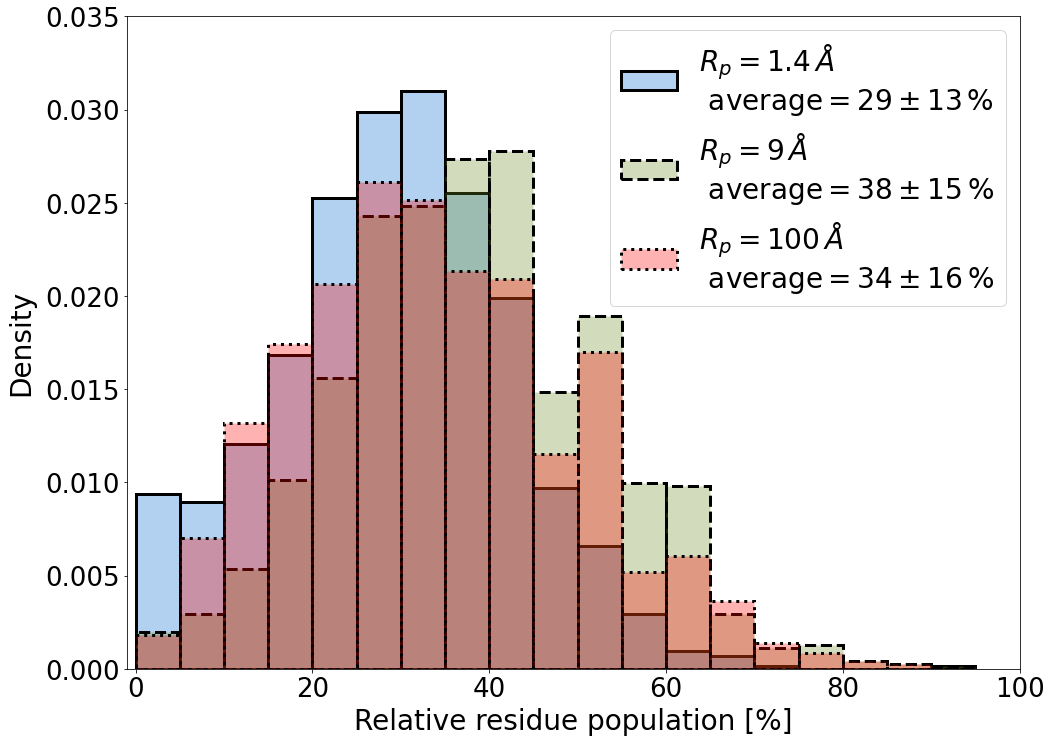

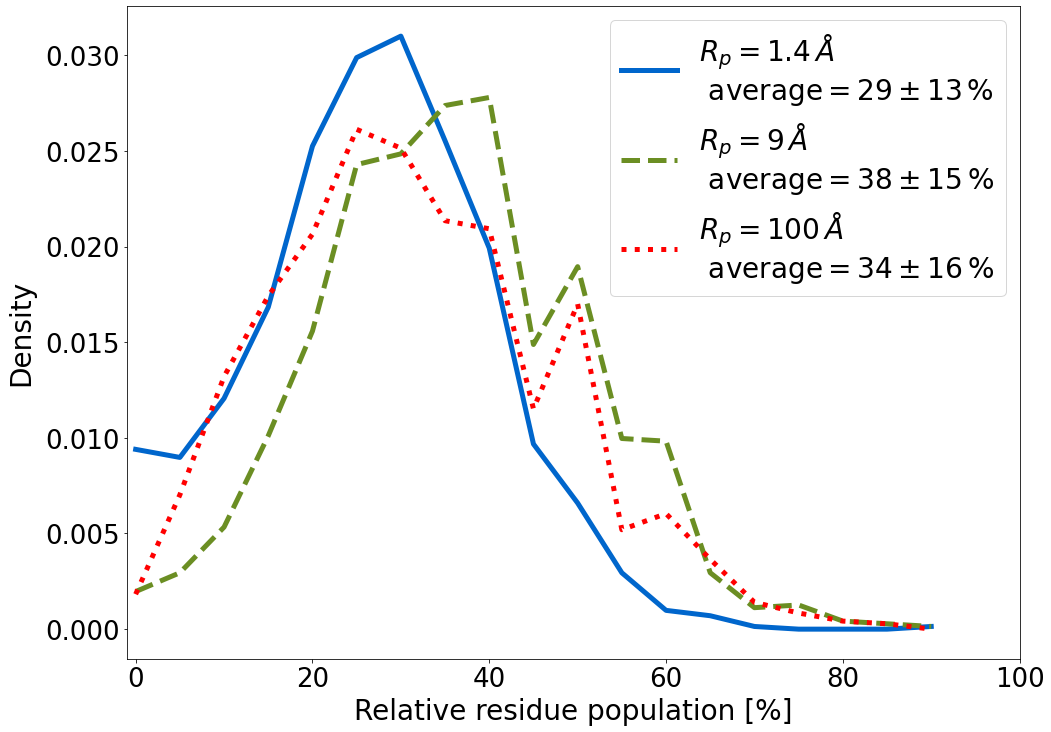

h_water STD = 13.439243 BANDWIDTH= 3.144495
h_9 STD = 14.790004 BANDWIDTH= 3.460544
h_100 STD = 15.559198 BANDWIDTH= 3.640519


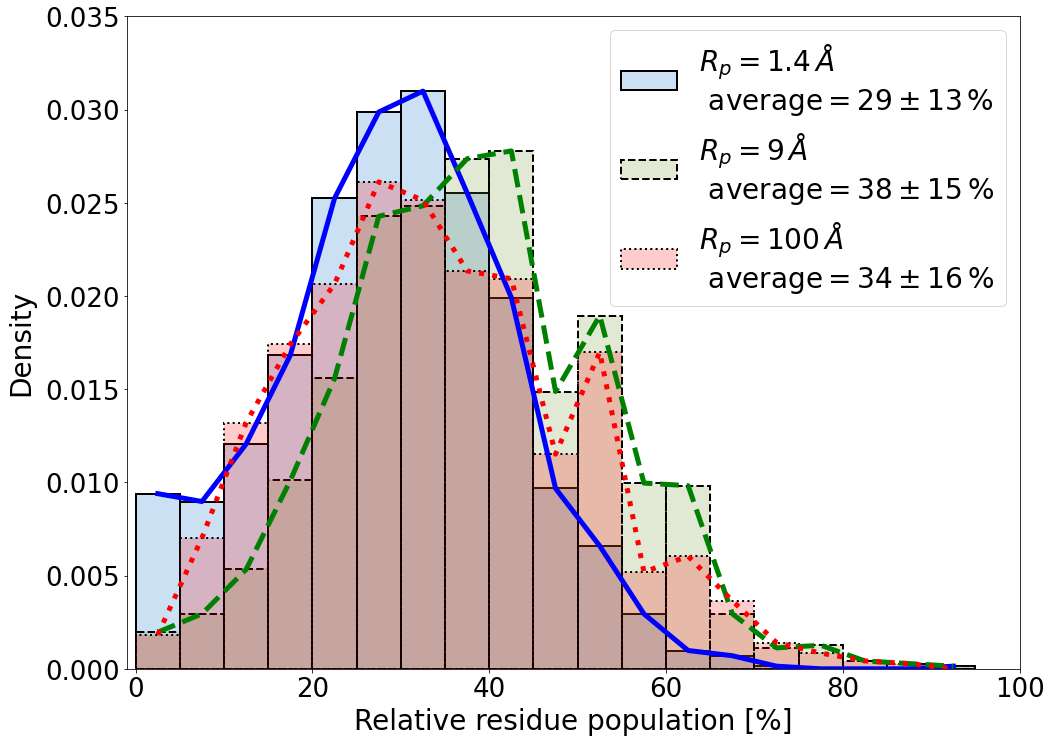

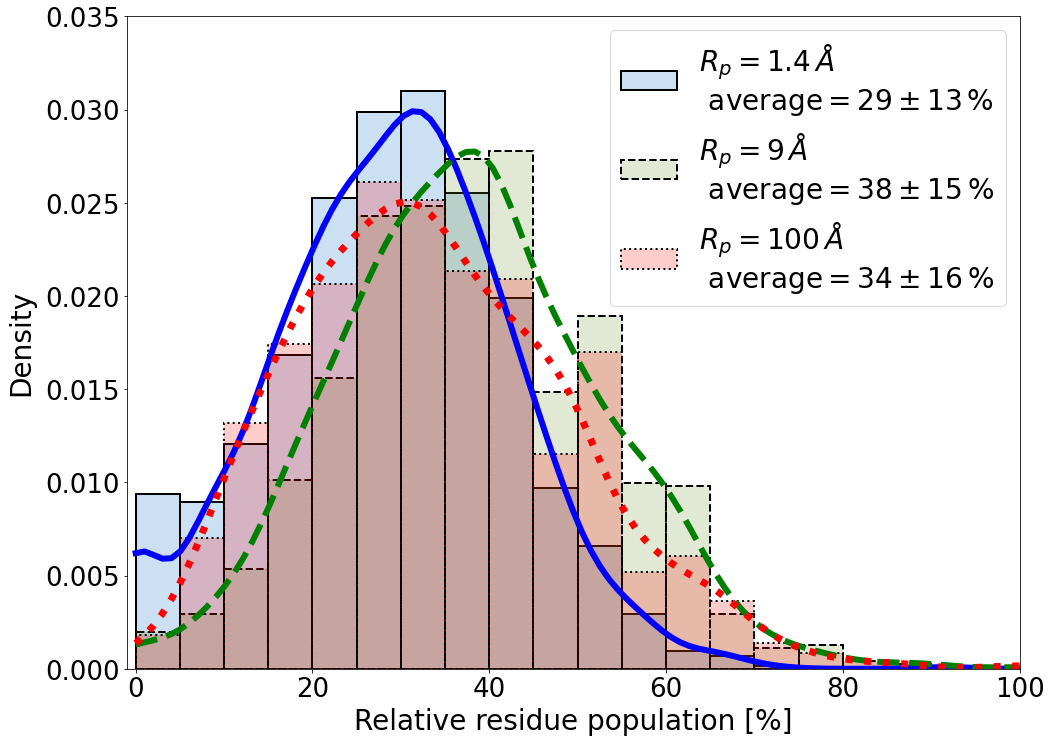

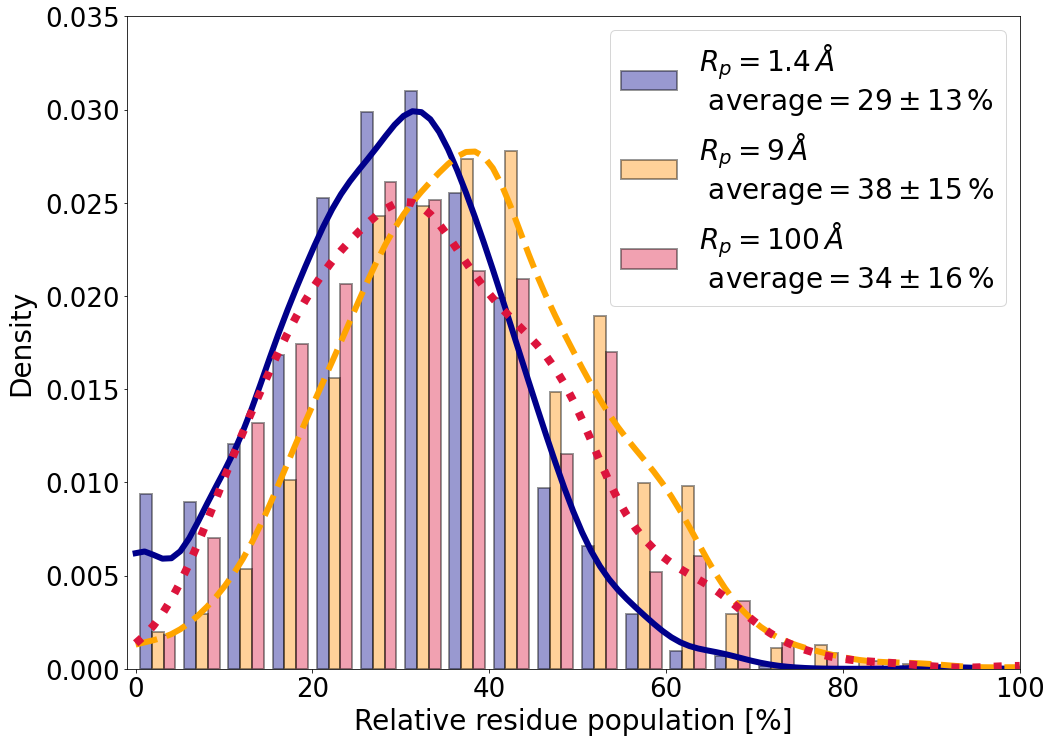

In [3]:
#Fai plot al contrario binnando percentuali

from matplotlib.pylab import *
labelfont = 28
tickfont =26
labeldistance = 0
legendFont=28


bins = np.arange(0,100,5)


fig = plt.figure(figsize=(16,12)) 
plt.xlim([-1,100])
plt.ylim([0,0.035])


h_water,x,_=plt.hist(exposedRES_waterALL,bins=bins, density=True, edgecolor='black',lw=3,fc=(0, 102/255, 204/255, 0.3),label=r"$R_p = 1.4\,\AA$"+"\n"+" average$=29 \pm13\,\%$",color='blue')
h_9,x,_=plt.hist(exposedRES_9ALL,bins=bins, density=True, edgecolor='black',lw=3,ls='dashed',fc=(107/255,142/255,35/255, 0.3),label=r"$R_p = 9\,\AA$"+"\n"+" average$=38 \pm15\,\%$",color='orange')
h_100,x,_=plt.hist(exposedRES_100ALL,bins=bins,density=True, edgecolor='black',lw=3,ls='dotted',fc=(255/255, 0, 0, 0.3),label=r"$R_p = 100\,\AA$"+"\n"+" average$=34 \pm16\,\%$",color='red')

plt.legend(fontsize=legendFont)

plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)
plt.savefig('exposed_histogram.jpg')
# plt.yticks([])
# exposedWater_hist,bn=np.histogram(exposedRES_waterALL, bins)
# print(exposedWater_hist)
# ax.plot(bn[:-1],exposedWater_hist)
##################################


fig = plt.figure(figsize=(16,12)) 

bins_line = np.arange(0,100,5)
bins = np.arange(0,100,5)


plt.xlim([-1,100])
h_water,bn = np.histogram(exposedRES_waterALL, bins_line,density=True)
# print(bn.shape)
# print(h_water.shape)

h_9,bn = np.histogram(exposedRES_9ALL, bins_line,density=True)
h_100,bn = np.histogram(exposedRES_100ALL,bins_line, density=True)
# bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bn[:-1],h_water,lw=5,label=r"$R_p = 1.4\,\AA$"+"\n"+" average$=29 \pm13\,\%$",color=(0, 102/255, 204/255))
plt.plot(bn[:-1],h_9,lw=5,label=r"$R_p = 9\,\AA$"+"\n"+" average$=38 \pm15\,\%$",color=(107/255,142/255,35/255),ls='dashed')
plt.plot(bn[:-1],h_100,lw=5,label=r"$R_p = 100\,\AA$"+"\n"+" average$=34 \pm16\,\%$",color=(255/255, 0, 0),ls='dotted')



plt.legend(fontsize=legendFont)

plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)
plt.savefig('exposed.jpg')

plt.show()

#####################

fig = plt.figure(figsize=(16,12)) 
plt.xlim([-1,100])
plt.ylim([0,0.035])


plt.hist(exposedRES_waterALL,bins=bins, density=True, edgecolor='black',lw=2,fc=(0, 102/255, 204/255,0.2),label=r"$R_p = 1.4\,\AA$"+"\n"+" average$=29 \pm13\,\%$")
plt.hist(exposedRES_9ALL,bins=bins, density=True, edgecolor='black',lw=2,ls='dashed',fc=(107/255,142/255,35/255,0.2),label=r"$R_p = 9\,\AA$"+"\n"+" average$=38 \pm15\,\%$")
plt.hist(exposedRES_100ALL,bins=bins,density=True, edgecolor='black',lw=2,ls='dotted',fc=(255/255, 0, 0,0.2),label=r"$R_p = 100\,\AA$"+"\n"+" average$=34 \pm16\,\%$")

#center the bin:
bn = 0.5*(bn[1:]+bn[:-1])
plt.plot(bn,h_water,lw=5,color='blue')
plt.plot(bn,h_9,lw=5,color='green',ls='dashed')
plt.plot(bn,h_100,lw=5,color='red',ls='dotted')

plt.legend(fontsize=legendFont)

plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)



plt.savefig('exposed_histogramWithLine.jpg')

#Gaussian Kernel Density Estimate

from scipy import stats

h_water_Gauss = stats.gaussian_kde(exposedRES_waterALL)
f = h_water_Gauss.covariance_factor()
std = np.std(exposedRES_waterALL)
bw = f * std
print("h_water STD = %f BANDWIDTH= %f"%(std,bw))
h_9_Gauss = stats.gaussian_kde(exposedRES_9ALL)
f = h_9_Gauss.covariance_factor()
std = np.std(exposedRES_9ALL)
bw = f * std
print("h_9 STD = %f BANDWIDTH= %f"%(std,bw))
h_100_Gauss = stats.gaussian_kde(exposedRES_100ALL)
f = h_100_Gauss.covariance_factor()
std = np.std(exposedRES_100ALL)
bw = f * std
print("h_100 STD = %f BANDWIDTH= %f"%(std,bw))

fig = plt.figure(figsize=(16,12)) 
plt.xlim([-1,100])
plt.ylim([0,0.035])
x= linspace(0,100,100)
plt.plot(histXRes[r]
plt.plot(x,h_9_Gauss.evaluate(x),lw=6,color='green',ls='dashed')
plt.plot(x,h_100_Gauss.evaluate(x),lw=7,color='red',ls='dotted')


plt.hist(exposedRES_waterALL,bins=bins, density=True, edgecolor='black',lw=2,fc=(0, 102/255, 204/255,0.2),label=r"$R_p = 1.4\,\AA$"+"\n"+" average$=29 \pm13\,\%$")
plt.hist(exposedRES_9ALL,bins=bins, density=True, edgecolor='black',lw=2,ls='dashed',fc=(107/255,142/255,35/255,0.2),label=r"$R_p = 9\,\AA$"+"\n"+" average$=38 \pm15\,\%$")
plt.hist(exposedRES_100ALL,bins=bins,density=True, edgecolor='black',lw=2,ls='dotted',fc=(255/255, 0, 0,0.2),label=r"$R_p = 100\,\AA$"+"\n"+" average$=34 \pm16\,\%$")




plt.legend(fontsize=legendFont)

plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.savefig('exposed_histogramWithLine_KDE.jpg')
##################################
##############





fig = plt.figure(figsize=(16,12)) 
plt.xlim([-1,100])
plt.ylim([0,0.035])
x= linspace(0,100,100)
plt.plot(x,h_water_Gauss.evaluate(x),lw=6,color='darkblue')
plt.plot(x,h_9_Gauss.evaluate(x),lw=6,color='orange',ls='dashed')
plt.plot(x,h_100_Gauss.evaluate(x),lw=8,color='crimson',ls='dotted')


plt.hist([exposedRES_waterALL,exposedRES_9ALL,exposedRES_100ALL],bins=bins, density=True, edgecolor='black',lw=2,label=[r"$R_p = 1.4\,\AA$"+"\n"+" average$=29 \pm13\,\%$",r"$R_p = 9\,\AA$"+"\n"+" average$=38 \pm15\,\%$",r"$R_p = 100\,\AA$"+"\n"+" average$=34 \pm16\,\%$"],color=['darkblue','darkorange','crimson'],alpha=0.4)




plt.legend(fontsize=legendFont)

plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.savefig('exposed_histogramWithLine_KDE2.jpg')
######################33




#############3
########3




# fig = plt.figure(figsize=(16,12)) 
# plt.xlim([-1,100])
# plt.ylim([0,0.035])
# x= linspace(0,100,100)
# plt.plot(x,h_water_Gauss.evaluate(x),lw=6,color='blue')
# plt.plot(x,h_9_Gauss.evaluate(x),lw=6,color='green',ls='dashed')
# plt.plot(x,h_100_Gauss.evaluate(x),lw=7,color='red',ls='dotted')


# plt.hist([exposedRES_waterALL,exposedRES_9ALL,exposedRES_100ALL],bins=bins, density=True, edgecolor='black',lw=2,label=[r"$R_p = 1.4\,\AA$"+"\n"+" average$=29 \pm13\,\%$",r"$R_p = 9\,\AA$"+"\n"+" average$=38 \pm15\,\%$",r"$R_p = 100\,\AA$"+"\n"+" average$=34 \pm16\,\%$"],color=['blue','green','red'])




# plt.legend(fontsize=legendFont)

# plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
# plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
# plt.xticks(fontsize=tickfont)
# plt.yticks(fontsize=tickfont)

# plt.savefig('exposed_histogramWithLine_3d.jpg')



## Subset at 2.5 A resolution

In [4]:
print(len(buried_fullabAREA))
print(len(protein_antigens))
protein_antigens_highRes = df_sabdab_90.query("antigen_type == antigen_type and antigen_type.str.contains('protein') and resolution <= 2.5").drop_duplicates()
print(len(protein_antigens_highRes))
df_sabdab_90_highRes = pd.read_pickle('structures/sabdad_90_cleaned_2.5.pickle')
protein_antigens_highRes = df_sabdab_90_highRes.query("antigen_type == antigen_type and antigen_type.str.contains('protein')").drop_duplicates()
print(len(protein_antigens_highRes))
# print(protein_antigens_highRes.head())

ab_both_chains = set(protein_antigens_highRes.query("Hchain == Hchain and Lchain == Lchain").pdb.values)

#Same filtering applied above:
buried_fullabAREA_highRes = df_withAREA.query(f"idcode.isin({list(ab_both_chains)})")
print(len(buried_fullabAREA_highRes))


# buried_ab_ag_interface_area = buried_fullabAREA[~buried_fullabAREA[['contact name']].astype(str).duplicated(keep='first')][['contact name','ag_ab_interface_AREA','ag_ab_interface_res','ag_interface_res_rp9','ag_interface_res_rp100']]
buried_ab_ag_interface_area_highRes = buried_fullabAREA_highRes.drop_duplicates(subset="contact name",keep = 'first')[['contact name','ag_ab_interface_AREA','ag_ab_interface_res','ag_interface_res_rp9','ag_interface_res_rp100']]

buried_ab_ag_interface_area_highRes['fraction1.4_RES']=buried_ab_ag_interface_area_highRes.apply(lambda row: get_fraction(row,1.4),axis=1)
buried_ab_ag_interface_area_highRes['fraction9_RES']=buried_ab_ag_interface_area_highRes.apply(lambda row: get_fraction(row,9),axis=1)
buried_ab_ag_interface_area_highRes['fraction100_RES']=buried_ab_ag_interface_area_highRes.apply(lambda row: get_fraction(row,100),axis=1)
buried_ab_ag_interface_area_highRes['fraction1.4_ATOMS']=buried_ab_ag_interface_area_highRes.apply(lambda row: get_fraction(row,1.4,useRES=False),axis=1)
buried_ab_ag_interface_area_highRes['fraction9_ATOMS']=buried_ab_ag_interface_area_highRes.apply(lambda row: get_fraction(row,9,useRES=False),axis=1)
buried_ab_ag_interface_area_highRes['fraction100_ATOMS']=buried_ab_ag_interface_area_highRes.apply(lambda row: get_fraction(row,100,useRES=False),axis=1)

# print(buried_ab_ag_interface_area_highRes[['contact name','ag_ab_interface_AREA','fraction1.4_RES','fraction9_RES','fraction100_RES','fraction1.4_ATOMS','fraction9_ATOMS','fraction100_ATOMS']].iloc[:5,:])


contactAreasALL_highRes=buried_ab_ag_interface_area_highRes['ag_ab_interface_AREA'].values
print("number of contacts = ", contactAreasALL_highRes.shape)

print("\nAVERAGE = %.3f +- %.3f" %(np.round(np.average(contactAreasALL),3),np.round(np.std(contactAreasALL),3)))

exposedRES_waterALL = buried_ab_ag_interface_area_highRes['fraction1.4_RES'].values
exposedATOMS_waterALL = buried_ab_ag_interface_area_highRes['fraction1.4_ATOMS'].values
exposedRES_9ALL = buried_ab_ag_interface_area_highRes['fraction9_RES'].values
exposedATOMS_9ALL = buried_ab_ag_interface_area_highRes['fraction9_ATOMS'].values
exposedRES_100ALL = buried_ab_ag_interface_area_highRes['fraction100_RES'].values
exposedATOMS_100ALL = buried_ab_ag_interface_area_highRes['fraction100_ATOMS'].values

print("\nFRACION OF EXPOSED")
print("\n**ATOM WISE**:")
print("AVERAGE 1.4 = %.3f +- %.3f" %(np.round(np.average(exposedATOMS_waterALL),3),np.round(np.std(exposedATOMS_waterALL),3)))
print("AVERAGE 9 = %.3f +- %.3f" %(np.round(np.average(exposedATOMS_9ALL),3),np.round(np.std(exposedATOMS_9ALL),3)))
print("AVERAGE 100 = %.3f +- %.3f" %(np.round(np.average(exposedATOMS_100ALL),3),np.round(np.std(exposedATOMS_100ALL),3)))

print("\n**RES WISE**:")
print("AVERAGE 1.4 = %.3f +- %.3f" %(np.round(np.average(exposedRES_waterALL),3),np.round(np.std(exposedRES_waterALL),3)))
print("AVERAGE 9 = %.3f +- %.3f" %(np.round(np.average(exposedRES_9ALL),3),np.round(np.std(exposedRES_9ALL),3)))
print("AVERAGE 100 = %.3f +- %.3f" %(np.round(np.average(exposedRES_100ALL),3),np.round(np.std(exposedRES_100ALL),3)))

8556
2909
555
471
1908
number of contacts =  (318,)

AVERAGE = 533.636 +- 156.975

FRACION OF EXPOSED

**ATOM WISE**:
AVERAGE 1.4 = 76.853 +- 7.927
AVERAGE 9 = 16.525 +- 5.669
AVERAGE 100 = 6.622 +- 4.795

**RES WISE**:
AVERAGE 1.4 = 27.957 +- 13.004
AVERAGE 9 = 34.817 +- 14.966
AVERAGE 100 = 37.226 +- 15.011


compare to 

AVERAGE 1.4 = 28.687 +- 13.439

AVERAGE 9 = 37.704 +- 14.790

AVERAGE 100 = 33.538 +- 15.559

h_water STD = 13.004311 BANDWIDTH= 4.107730
h_9 STD = 14.965510 BANDWIDTH= 4.727223
h_100 STD = 15.011122 BANDWIDTH= 4.741631


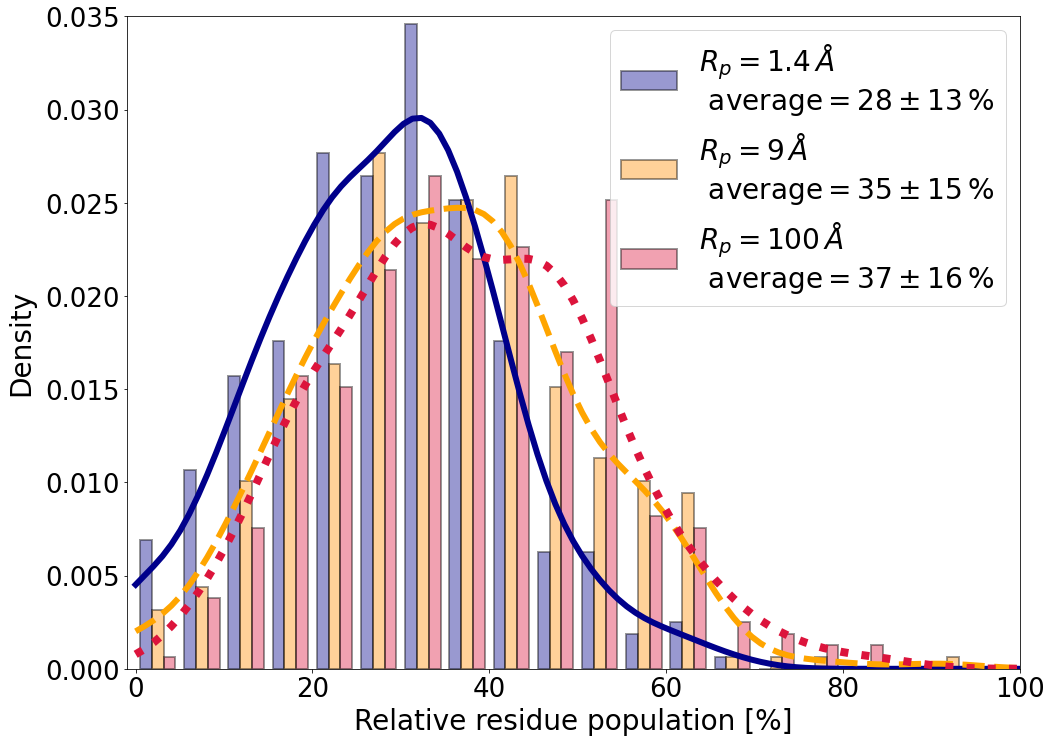

In [5]:
bins = np.arange(0,100,5)



# plt.yticks([])
# exposedWater_hist,bn=np.histogram(exposedRES_waterALL, bins)
# print(exposedWater_hist)
# ax.plot(bn[:-1],exposedWater_hist)
##################################

bins_line = np.arange(0,100,5)
bins = np.arange(0,100,5)


h_water,bn = np.histogram(exposedRES_waterALL, bins_line,density=True)
# print(bn.shape)
# print(h_water.shape)

h_9,bn = np.histogram(exposedRES_9ALL, bins_line,density=True)
h_100,bn = np.histogram(exposedRES_100ALL,bins_line, density=True)


#####################



h_water_Gauss = stats.gaussian_kde(exposedRES_waterALL)
f = h_water_Gauss.covariance_factor()
std = np.std(exposedRES_waterALL)
bw = f * std
print("h_water STD = %f BANDWIDTH= %f"%(std,bw))
h_9_Gauss = stats.gaussian_kde(exposedRES_9ALL)
f = h_9_Gauss.covariance_factor()
std = np.std(exposedRES_9ALL)
bw = f * std
print("h_9 STD = %f BANDWIDTH= %f"%(std,bw))
h_100_Gauss = stats.gaussian_kde(exposedRES_100ALL)
f = h_100_Gauss.covariance_factor()
std = np.std(exposedRES_100ALL)
bw = f * std
print("h_100 STD = %f BANDWIDTH= %f"%(std,bw))



fig = plt.figure(figsize=(16,12)) 
plt.xlim([-1,100])
plt.ylim([0,0.035])
x= linspace(0,100,100)
plt.plot(x,h_water_Gauss.evaluate(x),lw=6,color='darkblue')
plt.plot(x,h_9_Gauss.evaluate(x),lw=6,color='orange',ls='dashed')
plt.plot(x,h_100_Gauss.evaluate(x),lw=8,color='crimson',ls='dotted')


plt.hist([exposedRES_waterALL,exposedRES_9ALL,exposedRES_100ALL],bins=bins, density=True, edgecolor='black',lw=2,label=[r"$R_p = 1.4\,\AA$"+"\n"+" average$=28 \pm13\,\%$",r"$R_p = 9\,\AA$"+"\n"+" average$=35 \pm15\,\%$",r"$R_p = 100\,\AA$"+"\n"+" average$=37 \pm16\,\%$"],color=['darkblue','darkorange','crimson'],alpha=0.4)




plt.legend(fontsize=legendFont)

plt.xlabel(r'Relative residue population [%]', fontsize =labelfont,labelpad=5)
plt.ylabel(r'Density', fontsize =labelfont,labelpad=10)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.savefig('exposed_histogramWithLine_highRes.jpg')

# Contact patches analysis

### Threshold distance from exposed interface atom = 5

In [12]:
#load df
import numpy as np
import pandas as pd
def propLargeArea(x):
    areas = x['areas']
    total = np.sum(areas)
    largeContact = np.amax(areas)/total
    return largeContact*100
df_contacts=pd.read_pickle("scripts/patchesAnalysis/contacts_threshold5.pickle")
df_contacts['largeArea_prop'] = df_contacts.apply(lambda x: propLargeArea(x), axis=1)
print(df_contacts.head())

# n_contacts = df_contacts['n_connected'].values
# print(n_contacts,n_contacts.size)
# print(np.average(n_contacts),np.std(n_contacts))

# print(np.where(n_contacts<1))
# input()



values = df_contacts[['n_connected','largeArea_prop']].to_numpy()
# print(values)
print(values[:,0])
print(values[:,0].size)
print("maximum= ",np.amax(values[:,0]))
# print(values[values[:,0]>2].size)
# input()
median = np.median(values[:,0])
print('median number of connected patches on the epitope (+- absolute error): %f   std= %f' %(median,np.average(np.abs(values[:,0] - median))))
print('average number of connected patches on the epitope: %f   std= %f' %(np.average(values[:,0]),np.std(values[:,0])))
areaSProp = values[values[:,0]>1]

print("Number of system with more than 1 contact:",areaSProp.shape[0])
print("Which is the %f %% of the total"%(areaSProp.shape[0]/values.shape[0]*100))
print("Of these %f %% have 2 patches"%((areaSProp[areaSProp[:,0]<3]).shape[0]/areaSProp.shape[0]*100))
print("Proportion of largest patch = ",(np.average(areaSProp[:,1])))



                                ab_agName  n_connected                areas  \
0  7e9q_new/7e9q/7e9q_antibody_HL_antigen            1     [817.5029296875]   
1  7m3n_new/7m3n/7m3n_antibody_HL_antigen            1    [614.88427734375]   
2  5ywp_new/5ywp/5ywp_antibody_RQ_antigen            1   [1161.62158203125]   
3  3nps_new/3nps/3nps_antibody_BC_antigen            1     [875.0576171875]   
4  7tp4_new/7tp4/7tp4_antibody_HL_antigen            1  [850.9390869140625]   

  fraction total  largeArea_prop  
0        [100.0]           100.0  
1        [100.0]           100.0  
2        [100.0]           100.0  
3        [100.0]           100.0  
4        [100.0]           100.0  
[1. 1. 1. ... 1. 1. 1.]
1425
maximum=  5.0
median number of connected patches on the epitope (+- absolute error): 1.000000   std= 0.180351
average number of connected patches on the epitope: 1.180351   std= 0.450068
Number of system with more than 1 contact: 225
Which is the 15.789474 % of the total
Of these 88.44

### Threshold distance from exposed interface atom = 4

In [11]:
df_contacts=pd.read_pickle("scripts/patchesAnalysis/contacts_threshold4.pickle") #< ----


df_contacts['largeArea_prop'] = df_contacts.apply(lambda x: propLargeArea(x), axis=1)
print(df_contacts.head())

# n_contacts = df_contacts['n_connected'].values
# print(n_contacts,n_contacts.size)
# print(np.average(n_contacts),np.std(n_contacts))

# print(np.where(n_contacts<1))
# input()



values = df_contacts[['n_connected','largeArea_prop']].to_numpy()
# print(values)
print(values[:,0])
print(values[:,0].size)
print("maximum= ",np.amax(values[:,0]))
# print(values[values[:,0]>2].size)
# input()
median = np.median(values[:,0])
print('median number of connected patches on the epitope (+- absolute error): %f   std= %f' %(median,np.average(np.abs(values[:,0] - median))))
print('average number of connected patches on the epitope: %f   std= %f' %(np.average(values[:,0]),np.std(values[:,0])))
areaSProp = values[values[:,0]>1]

print("Number of system with more than 1 contact:",areaSProp.shape[0])
print("Which is the %f %% of the total"%(areaSProp.shape[0]/values.shape[0]*100))
print("Of these %f %% have 2 patches"%((areaSProp[areaSProp[:,0]<3]).shape[0]/areaSProp.shape[0]*100))
print("Proportion of largest patch = ",(np.average(areaSProp[:,1])))

                                ab_agName  n_connected  \
0  7e9q_new/7e9q/7e9q_antibody_HL_antigen            4   
1  7m3n_new/7m3n/7m3n_antibody_HL_antigen            1   
2  5ywp_new/5ywp/5ywp_antibody_RQ_antigen            1   
3  3nps_new/3nps/3nps_antibody_BC_antigen            1   
4  7tp4_new/7tp4/7tp4_antibody_HL_antigen            1   

                                               areas  \
0  [108.1776351928711, 51.101348876953125, 49.215...   
1                               [486.51739501953125]   
2                                [993.6458740234375]   
3                                 [700.512451171875]   
4                                [692.8098754882812]   

                                      fraction total  largeArea_prop  
0  [20.43432274012881, 9.652840474334877, 9.29655...       60.616282  
1                                            [100.0]      100.000000  
2                                            [100.0]      100.000000  
3                             